<a href="https://colab.research.google.com/github/alikaiser12/AI/blob/main/Kiti_Optical_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from glob import glob
import re
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Define the folder path in Google Drive (adjust according to your folder structure)
data_path = '/content/drive/MyDrive/Video'

# List .jpg files in the folder
image_paths = [os.path.join(data_path, file) for file in os.listdir(data_path) if file.lower().endswith('.mp4')]

# Print the list of image paths
print(image_paths)

['/content/drive/MyDrive/Video/video-2 clip-1 (30 sec).mp4', '/content/drive/MyDrive/Video/clip 2.mp4']


In [ ]:
import glob
import re
import os

# Define the folder path in Google Drive
data_path = '/content/drive/MyDrive/Video'

# Use glob to get all jpg files in the folder
# If a filename doesn't have digits, it will be treated as 0 for sorting.
image_paths = sorted(glob.glob(f"{data_path}/*.mp4"), key=lambda x: float(re.findall("(\d+)", x)[0]) if re.findall("(\d+)", x) else 0)

# Print the list of image paths
print(image_paths)

['/content/drive/MyDrive/Video/video-2 clip-1 (30 sec).mp4', '/content/drive/MyDrive/Video/clip 2.mp4']


In [ ]:
!pip install ultralytics
import cv2
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # Load a pretrained YOLOv8n model
cap = cv2.VideoCapture("clip 2.mp4")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    results = model(frame)  # Detect objects
    annotated_frame = results[0].plot()  # Draw bounding boxes
    cv2.imshow("Annotated Video", annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

100%|██████████| 6.25M/6.25M [00:00<00:00, 94.7MB/s]


In [ ]:
pip install opencv-python

In [ ]:
import cv2
import os

# Create a folder to save extracted frames
output_folder = "frames"
os.makedirs(output_folder, exist_ok=True)

# Load the video file
video_path = "/content/drive/MyDrive/Video/clip 2.mp4"
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

frame_number = 0

# Loop through video frames
while True:
    ret, frame = cap.read()
    if not ret:
        break  # No more frames, end of video

    # Optional: Do something with the frame (e.g., display, process, etc.)

    # Save each frame as an image
    frame_filename = os.path.join(output_folder, f"frame_{frame_number:04d}.png")
    cv2.imwrite(frame_filename, frame)

    frame_number += 1

# Release the video capture object
cap.release()
print(f"Done! Extracted {frame_number} frames to '{output_folder}' folder.")

Done! Extracted 900 frames to 'frames' folder.


In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17485, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 17485 (delta 80), reused 31 (delta 31), pack-reused 17376 (from 3)
Receiving objects: 100% (17485/17485), 16.33 MiB | 18.73 MiB/s, done.
Resolving deltas: 100% (11984/11984), done.
/content/yolov5


In [ ]:
!python detect.py --source /content/frames --weights yolov5s.pt --conf 0.4 --save-txt --save-conf --project ../output --name annotated_frames

detect: weights=['yolov5s.pt'], source=/content/frames, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../output, name=annotated_frames, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.11.12 torch-2.6.0+cu124 CPU

100% 14.1M/14.1M [00:00<00:00, 166MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/900 /content/frames/frame_0000.png: 384x640 4 persons, 309.0ms
image 2/900 /content/frames/frame_0001.png: 384x640 4 persons, 413.3ms
image 3/900 /content/frames/frame_0002.png: 384x640 5 persons, 457.2ms
image 4/900 /content/frames/frame_0003.png: 384x640 8 persons, 412.1ms
image 5/900 /content/frames

In [ ]:
import cv2
import os

image_folder = "/content/output/annotated_frames"  # Changed to include the subfolder
output_video = "annotated_video.mp4"
fps = 30  # Set your original video's FPS

# Check if the folder exists
if not os.path.exists(image_folder):
    print(f"Error: Folder '{image_folder}' not found. Make sure you have run the object detection and annotation step.")
    exit()

# Get all files with .png extension
images = sorted([img for img in os.listdir(image_folder) if img.endswith(".png")])

if not images:
    print(f"Error: No image files found in '{image_folder}'.")
    exit()

frame_path = os.path.join(image_folder, images[0])
frame = cv2.imread(frame_path)
height, width, layers = frame.shape

video = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

for image_name in images:
    image = cv2.imread(os.path.join(image_folder, image_name))
    video.write(image)

video.release()
print("✅ Annotated video saved as:", output_video)

✅ Annotated video saved as: annotated_video.mp4


In [ ]:
from google.colab import files
files.download('annotated_video.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import math

def get_direction(prev_x, prev_y, curr_x, curr_y):
    dx = curr_x - prev_x
    dy = curr_y - prev_y

    angle = math.degrees(math.atan2(-dy, dx))  # y axis is flipped in image coords
    angle = (angle + 360) % 360  # Normalize to 0–360

    return angle

In [ ]:
def angle_to_direction(angle):
    directions = ['East', 'North-East', 'North', 'North-West',
                  'West', 'South-West', 'South', 'South-East']
    index = int(((angle + 22.5) % 360) // 45)
    return directions[index]


In [ ]:
# Object 1 moved from (100, 250) to (300, 200)
angle = get_direction(100, 250, 300, 200)
direction = angle_to_direction(angle)
print(f"Object is moving towards: {direction}")


Object is moving towards: East


In [ ]:
import cv2
import os

# Assuming 'x' and 'y' represent the coordinates where you want to place the text
# Replace these with the actual x and y coordinates of the object's center
x = 100  # Example value for x
y = 200  # Example value for y


cv2.putText(frame, f"Dir: {direction}", (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

array([[[253, 253, 251],
        [253, 253, 251],
        [253, 253, 251],
        ...,
        [251, 227, 229],
        [251, 227, 229],
        [251, 227, 229]],

       [[253, 253, 251],
        [253, 253, 251],
        [253, 253, 251],
        ...,
        [251, 227, 229],
        [251, 227, 229],
        [251, 227, 229]],

       [[253, 253, 251],
        [253, 253, 251],
        [253, 253, 251],
        ...,
        [251, 227, 229],
        [251, 227, 229],
        [251, 227, 229]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [ ]:
import cv2
import numpy as np
import os

# Load video
cap = cv2.VideoCapture('annotated_video.mp4')

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video file.")
else:
    # Read the first frame
    ret, first_frame = cap.read()
    if not ret:
        print("Error: Could not read frame from video.")
        cap.release()
    else:
        # Set up optical flow
        prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

        # Set up video writer
        height, width = first_frame.shape[:2]
        out_filename = 'optical_flow_output.mp4'
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # For .mp4 format
        out = cv2.VideoWriter(out_filename, fourcc, 20.0, (width, height))  # 20 FPS

        # Loop over frames
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            # Optical flow calculation
            flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None,
                                                0.5, 3, 15, 3, 5, 1.2, 0)
            magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1], angleInDegrees=True)

            # HSV image
            hsv = np.zeros_like(frame)
            hsv[..., 1] = 255
            hsv[..., 0] = angle / 2  # Hue
            hsv[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

            bgr_flow = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

            out.write(bgr_flow)  # Write frame to output video

            prev_gray = gray

        # Release resources
        cap.release()
        out.release()
        print(f"Optical flow video saved as {out_filename}")

Optical flow video saved as optical_flow_output.mp4


In [ ]:
from google.colab import files
files.download('optical_flow_output.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np

# Load video
cap = cv2.VideoCapture('annotated_video.mp4')

# Background subtractor
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50)

# Read first frame
ret, first_frame = cap.read()
if not ret:
    print("Error: Could not read frame")
    cap.release()

prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

# Output video writer
h, w = first_frame.shape[:2]
out = cv2.VideoWriter('obstacle_detected.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 20, (w, h))

In [ ]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # --- Motion Detection using Optical Flow ---
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None,
                                        0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    motion_mask = (mag > 1.0).astype(np.uint8) * 255  # motion threshold

    # --- Stationary Object Detection using Background Subtraction ---
    fgmask = fgbg.apply(frame)
    _, fg_thresh = cv2.threshold(fgmask, 200, 255, cv2.THRESH_BINARY)
    fg_thresh = cv2.morphologyEx(fg_thresh, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

    # Combine both masks
    combined = cv2.bitwise_or(fg_thresh, motion_mask)

    # Find contours of detected obstacles
    contours, _ = cv2.findContours(combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) > 500:  # filter small noise
            x, y, w_, h_ = cv2.boundingRect(cnt)
            cv2.rectangle(frame, (x, y), (x+w_, y+h_), (0, 0, 255), 2)
            cv2.putText(frame, "Obstacle", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    out.write(frame)
    prev_gray = gray

In [ ]:
cap.release()
out.release()
print("Obstacle detection video saved.")

Obstacle detection video saved.


In [ ]:
from google.colab import files
files.download('obstacle_detected.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np

# Assume focal length and real object height
focal_length = 353  # From calibration step above
real_object_height = 1.7  # meters (adjust based on expected object)

cap = cv2.VideoCapture('annotated_video.mp4')
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50)

ret, first_frame = cap.read()
if not ret:
    print("Failed to read video")
    cap.release()

prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

h, w = first_frame.shape[:2]
out = cv2.VideoWriter('distance_estimated.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 20, (w, h))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Optical flow
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None,
                                        0.5, 3, 15, 3, 5, 1.2, 0)
    mag, _ = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    motion_mask = (mag > 1.0).astype(np.uint8) * 255

    # Foreground mask
    fgmask = fgbg.apply(frame)
    _, fg_thresh = cv2.threshold(fgmask, 200, 255, cv2.THRESH_BINARY)
    fg_thresh = cv2.morphologyEx(fg_thresh, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))

    combined = cv2.bitwise_or(fg_thresh, motion_mask)

    contours, _ = cv2.findContours(combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) > 500:
            x, y, w_box, h_box = cv2.boundingRect(cnt)

            # Estimate distance using object height in pixels
            distance = (real_object_height * focal_length) / h_box
            distance = round(distance, 2)

            # Draw rectangle and label
            cv2.rectangle(frame, (x, y), (x + w_box, y + h_box), (0, 255, 0), 2)
            cv2.putText(frame, f"Obstacle: {distance}m", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)

    out.write(frame)
    prev_gray = gray

cap.release()
out.release()


In [ ]:
from google.colab import files
files.download('distance_estimated.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

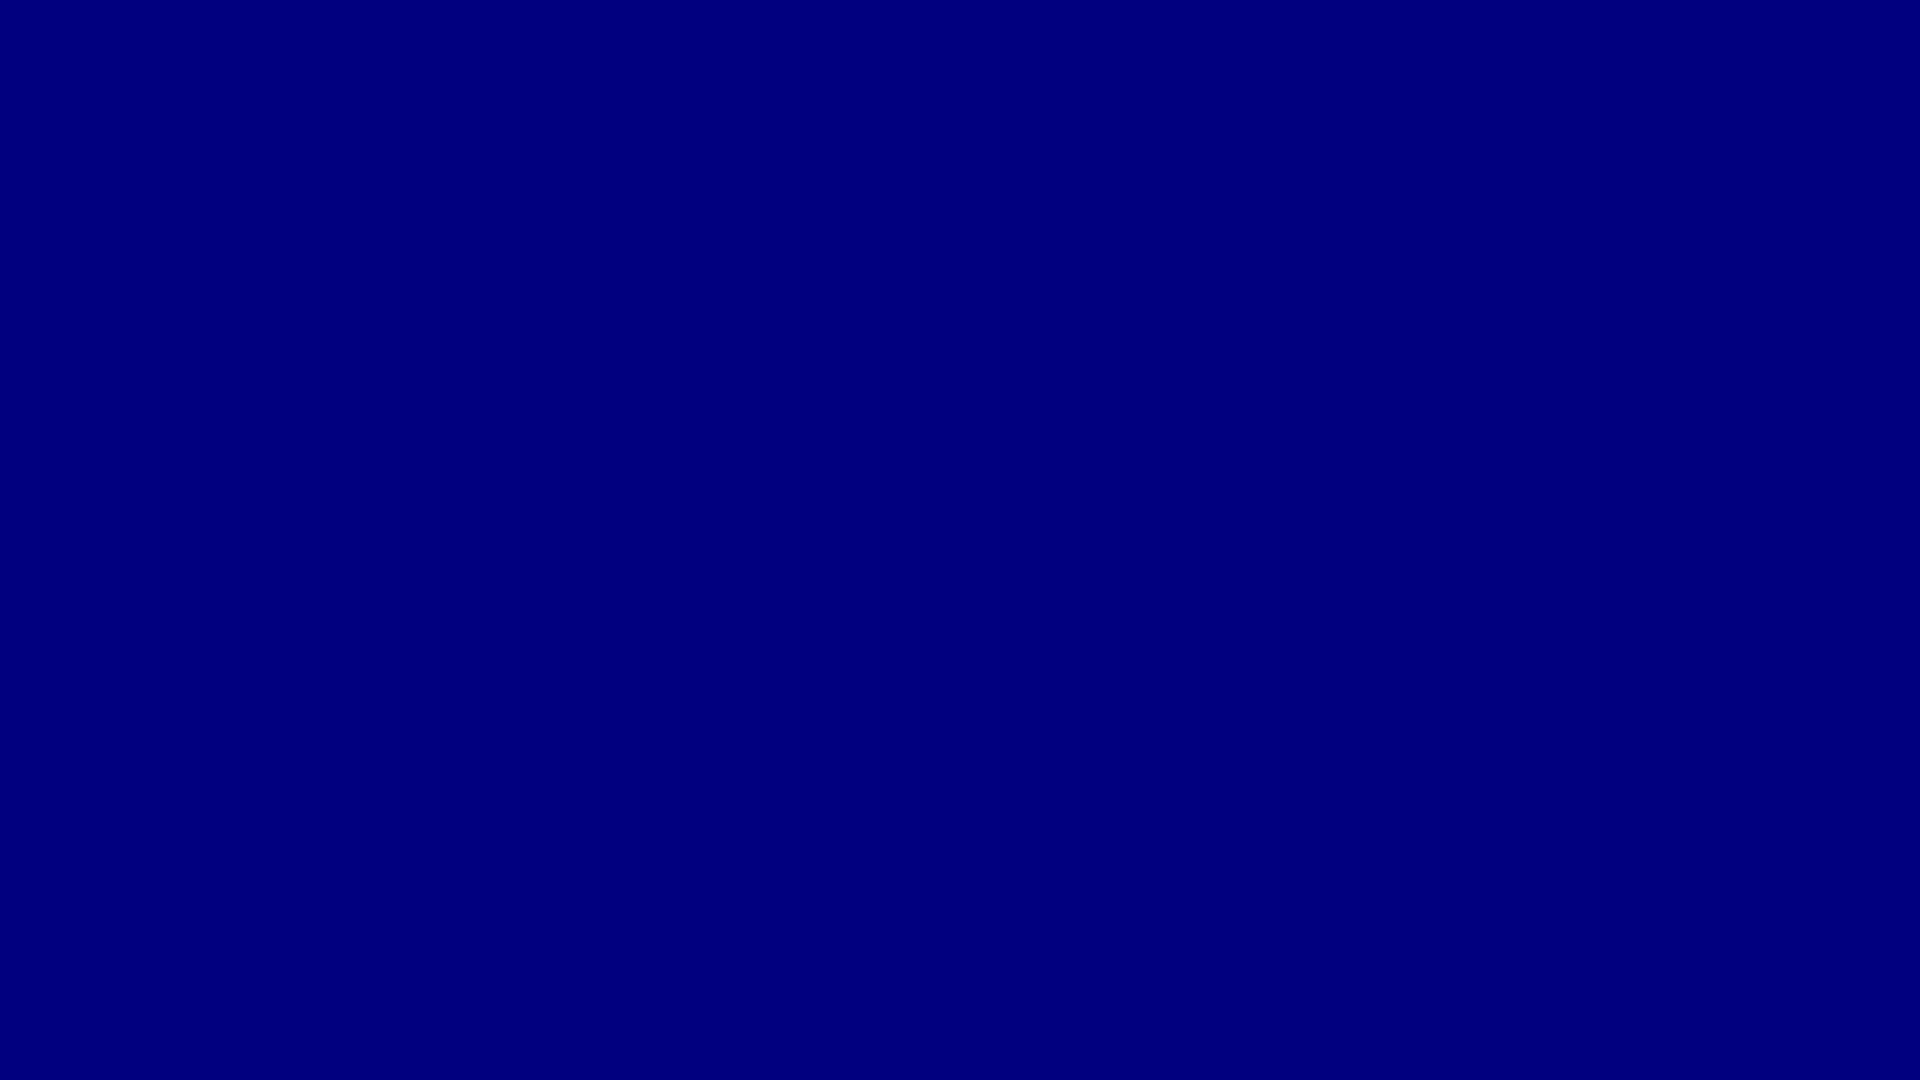

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Assume focal length and real object height
focal_length = 353  # From calibration step above
real_object_height = 1.7  # meters (adjust based on expected object)

# cap and other variables are assumed to be initialized from previous cells

heatmap = np.zeros((h, w), dtype=np.float32)

# In frame loop:
# The code snippet provided is outside the video processing loop.
# To correctly build the heatmap, this addition should be inside the loop
# that processes each frame where 'motion_mask' is calculated.
# However, based on the error's location, it seems the intent was to
# show a heatmap *after* processing all frames. Let's assume you want
# to display the heatmap of the last processed frame or a cumulative one.
# Since 'motion_mask' is available as a global variable (likely from the last frame),
# we can use it to demonstrate the fix for the display function.
# To create a cumulative heatmap across all frames, you would need to
# add the 'heatmap += (motion_mask / 255).astype(np.float32)' line inside
# your video processing loop where 'motion_mask' is calculated for each frame.

# For demonstration, let's assume 'motion_mask', 'h', and 'w' are available
# from the last frame processed in a previous cell.
# If you intend to build a cumulative heatmap, the heatmap initialization
# and accumulation need to be part of your video processing loop.

# Example demonstrating the display part assuming heatmap is already populated
# Initialize heatmap if it's not already done in a loop
if 'heatmap' not in locals() or heatmap is None:
    # This part should ideally be within your video processing loop
    # For demonstration, create a dummy heatmap if not available
    print("Note: Heatmap accumulation is not shown in this snippet. Displaying based on available variables.")
    if 'h' in locals() and 'w' in locals():
         heatmap = np.zeros((h, w), dtype=np.float32)
         # If motion_mask from last frame is available, use it
         if 'motion_mask' in locals() and motion_mask is not None:
              heatmap += (motion_mask / 255).astype(np.float32)
    else:
         print("Error: 'h' and 'w' not defined. Cannot create heatmap.")
         # Exit or handle error appropriately

# Normalize & show
if 'heatmap' in locals() and heatmap is not None:
    norm_heatmap = cv2.normalize(heatmap, None, 0, 255, cv2.NORM_MINMAX)
    colored_map = cv2.applyColorMap(norm_heatmap.astype(np.uint8), cv2.COLORMAP_JET)
    cv2_imshow(colored_map) # Use the imported cv2_imshow
else:
    print("Heatmap is not available to display.")


In [ ]:
import cv2
import numpy as np
from sklearn.linear_model import LinearRegression
from collections import deque
import matplotlib.pyplot as plt

# Video source
cap = cv2.VideoCapture('annotated_video.mp4')

# Optical flow init
ret, first_frame = cap.read()
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
h, w = first_frame.shape[:2]

# Parameters
trajectory = deque(maxlen=30)  # Store recent positions
frame_count = 0

# Output video writer
out = cv2.VideoWriter('predicted_path.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 20, (w, h))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None,
                                        0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    motion_mask = (mag > 1.0).astype(np.uint8) * 255

    contours, _ = cv2.findContours(motion_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest = None
    max_area = 0

    # Track largest moving object
    for cnt in contours:
        if cv2.contourArea(cnt) > 500:
            if cv2.contourArea(cnt) > max_area:
                max_area = cv2.contourArea(cnt)
                largest = cnt

    if largest is not None:
        x, y, w_box, h_box = cv2.boundingRect(largest)
        cx = x + w_box // 2
        cy = y + h_box // 2

        trajectory.append((frame_count, cx, cy))
        cv2.rectangle(frame, (x, y), (x + w_box, y + h_box), (0, 255, 0), 2)
        cv2.circle(frame, (cx, cy), 4, (0, 0, 255), -1)

    # Fit linear regression and predict future trajectory
    if len(trajectory) >= 10:
        arr = np.array(trajectory)
        times = arr[:, 0].reshape(-1, 1)
        xs = arr[:, 1]
        ys = arr[:, 2]

        model_x = LinearRegression().fit(times, xs)
        model_y = LinearRegression().fit(times, ys)

        future_times = np.array([[frame_count + i] for i in range(1, 31)])
        pred_xs = model_x.predict(future_times).astype(int)
        pred_ys = model_y.predict(future_times).astype(int)

        for px, py in zip(pred_xs, pred_ys):
            if 0 <= px < w and 0 <= py < h:
                cv2.circle(frame, (px, py), 2, (255, 0, 0), -1)

    prev_gray = gray
    frame_count += 1
    out.write(frame)

cap.release()
out.release()
print("Path prediction saved to predicted_path.mp4")

Path prediction saved to predicted_path.mp4


In [ ]:
from google.colab import files
files.download('predicted_path.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np

# Initialize Kalman Filter
kf = cv2.KalmanFilter(4, 2)  # stateSize=4, measSize=2
kf.measurementMatrix = np.array([[1, 0, 0, 0],
                                 [0, 1, 0, 0]], np.float32)

kf.transitionMatrix = np.array([[1, 0, 1, 0],
                                [0, 1, 0, 1],
                                [0, 0, 1, 0],
                                [0, 0, 0, 1]], np.float32)

kf.processNoiseCov = np.eye(4, dtype=np.float32) * 0.03
kf.measurementNoiseCov = np.eye(2, dtype=np.float32) * 1

# Video input
cap = cv2.VideoCapture('annotated_video.mp4')
ret, first_frame = cap.read()
if not ret:
    raise RuntimeError("Failed to read video")

prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
h, w = first_frame.shape[:2]

out = cv2.VideoWriter('kalman_path.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 20, (w, h))
predicted_points = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None,
                                        0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    motion_mask = (mag > 1.0).astype(np.uint8) * 255

    contours, _ = cv2.findContours(motion_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest = None
    max_area = 0

    for cnt in contours:
        if cv2.contourArea(cnt) > 500:
            if cv2.contourArea(cnt) > max_area:
                max_area = cv2.contourArea(cnt)
                largest = cnt

    if largest is not None:
        x, y, w_box, h_box = cv2.boundingRect(largest)
        cx = x + w_box // 2
        cy = y + h_box // 2

        measurement = np.array([[np.float32(cx)], [np.float32(cy)]])
        kf.correct(measurement)

        prediction = kf.predict()
        px, py = int(prediction[0]), int(prediction[1])

        predicted_points.append((px, py))

        # Draw actual and predicted points
        cv2.circle(frame, (cx, cy), 5, (0, 0, 255), -1)  # Measured position
        cv2.circle(frame, (px, py), 5, (255, 0, 0), -1)  # Predicted position

        # Draw trail of predictions
        for i in range(1, len(predicted_points)):
            cv2.line(frame, predicted_points[i - 1], predicted_points[i], (255, 0, 0), 2)

    prev_gray = gray
    out.write(frame)

cap.release()
out.release()
print("Kalman prediction saved to kalman_path.mp4")

<ipython-input-30-c9b5f3aba19c>:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  px, py = int(prediction[0]), int(prediction[1])


Kalman prediction saved to kalman_path.mp4


In [ ]:
from google.colab import files
files.download('kalman_path.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>